In [ ]:
# left offL cntrl f ; MasVnrArea****

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [ ]:

!pip install -r requirements.txt


In [ ]:
tr = pd.read_csv(r'C:\Users\billh\Documents\projects\BAN_final_project\data\train.csv')
te = pd.read_csv(r"C:\Users\billh\Documents\projects\BAN_final_project\data\test.csv")

tr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
tr.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]
tr = tr[tr.Id.isin(values) == False]

In [ ]:
tr['Alley'].fillna('No', inplace=True)
tr['Alley'].fillna('No', inplace=True)

tr['Fence'].fillna('No', inplace=True)
tr['Fence'].fillna('No', inplace=True)



C:\Users\billh\AppData\Local\Temp\ipykernel_19588\1083410090.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tr['Alley'].fillna('No', inplace=True)
C:\Users\billh\AppData\Local\Temp\ipykernel_19588\1083410090.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [ ]:
tr['MasVnrType'].fillna('No', inplace=True)
te['MasVnrType'].fillna('No', inplace=True)

tr['MasVnrArea'].fillna(0, inplace=True)
te['MasVnrArea'].fillna(0, inplace=True)


tr['FireplaceQu'].fillna('No', inplace=True)
te['FireplaceQu'].fillna('No', inplace=True)

tr['LotFrontage'].fillna(0, inplace=True)
te['LotFrontage'].fillna(0, inplace=True)

tr['GarageCond'].fillna('No', inplace=True)
te['GarageCond'].fillna('No', inplace=True)

tr['GarageType'].fillna('No', inplace=True)
te['GarageType'].fillna('No', inplace=True)

tr['GarageFinish'].fillna('No', inplace=True)
te['GarageFinish'].fillna('No', inplace=True)

tr['GarageQual'].fillna('No', inplace=True)
te['GarageQual'].fillna('No', inplace=True)

tr['BsmtFinType2'].fillna('Unf', inplace=True)
te['BsmtFinType2'].fillna('Unf', inplace=True)

tr['BsmtExposure'].fillna('No', inplace=True)
te['BsmtExposure'].fillna('No', inplace=True)

tr['BsmtQual'].fillna('No', inplace=True)
te['BsmtQual'].fillna('No', inplace=True)

tr['BsmtCond'].fillna('No', inplace=True)
te['BsmtCond'].fillna('No', inplace=True)

tr['MasVnrArea'].fillna(0, inplace=True)
te['MasVnrArea'].fillna(0, inplace=True)

tr['Electrical'].fillna('SBrkr', inplace=True)
te['Electrical'].fillna('SBrkr', inplace=True)

C:\Users\billh\AppData\Local\Temp\ipykernel_19588\52232279.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tr['MasVnrType'].fillna('No', inplace=True)
C:\Users\billh\AppData\Local\Temp\ipykernel_19588\52232279.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [ ]:
tr = tr.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
te = te.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])


KeyError: "['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'] not found in axis"

In [ ]:
tr["dataset_type"] = "train"
te["dataset_type"] = "test"

# Merge them together
combined = pd.concat([tr, te], axis=0)
cb =  combined


In [ ]:
cb["age_of_house"] = cb["YearBuilt"] - cb["YrSold"]


cb['totalsf'] = cb['1stFlrSF'] + cb['2ndFlrSF'] + cb['BsmtFinSF1'] + cb['BsmtFinSF2']

cb['houseremodelage'] = cb['YrSold'] - cb['YearRemodAdd']

cb['totalsf'] = cb['1stFlrSF'] + cb['2ndFlrSF'] + cb['BsmtFinSF1'] + cb['BsmtFinSF2']

cb['totalarea'] = cb['GrLivArea'] + cb['TotalBsmtSF']

cb['totalbaths'] = cb['BsmtFullBath'] + cb['FullBath'] + 0.5 * (cb['BsmtHalfBath'] + cb['HalfBath'])

cb['totalporchsf'] = cb['OpenPorchSF'] + cb['3SsnPorch'] + cb['EnclosedPorch'] + cb['ScreenPorch'] + cb['WoodDeckSF']

cb = cb.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])



In [ ]:
# Separate back into train and test
tr2 = cb[cb["dataset_type"] == "train"].drop(columns=["dataset_type"])
te2  = cb[cb["dataset_type"] == "test"].drop(columns=["dataset_type"])



<Axes: >

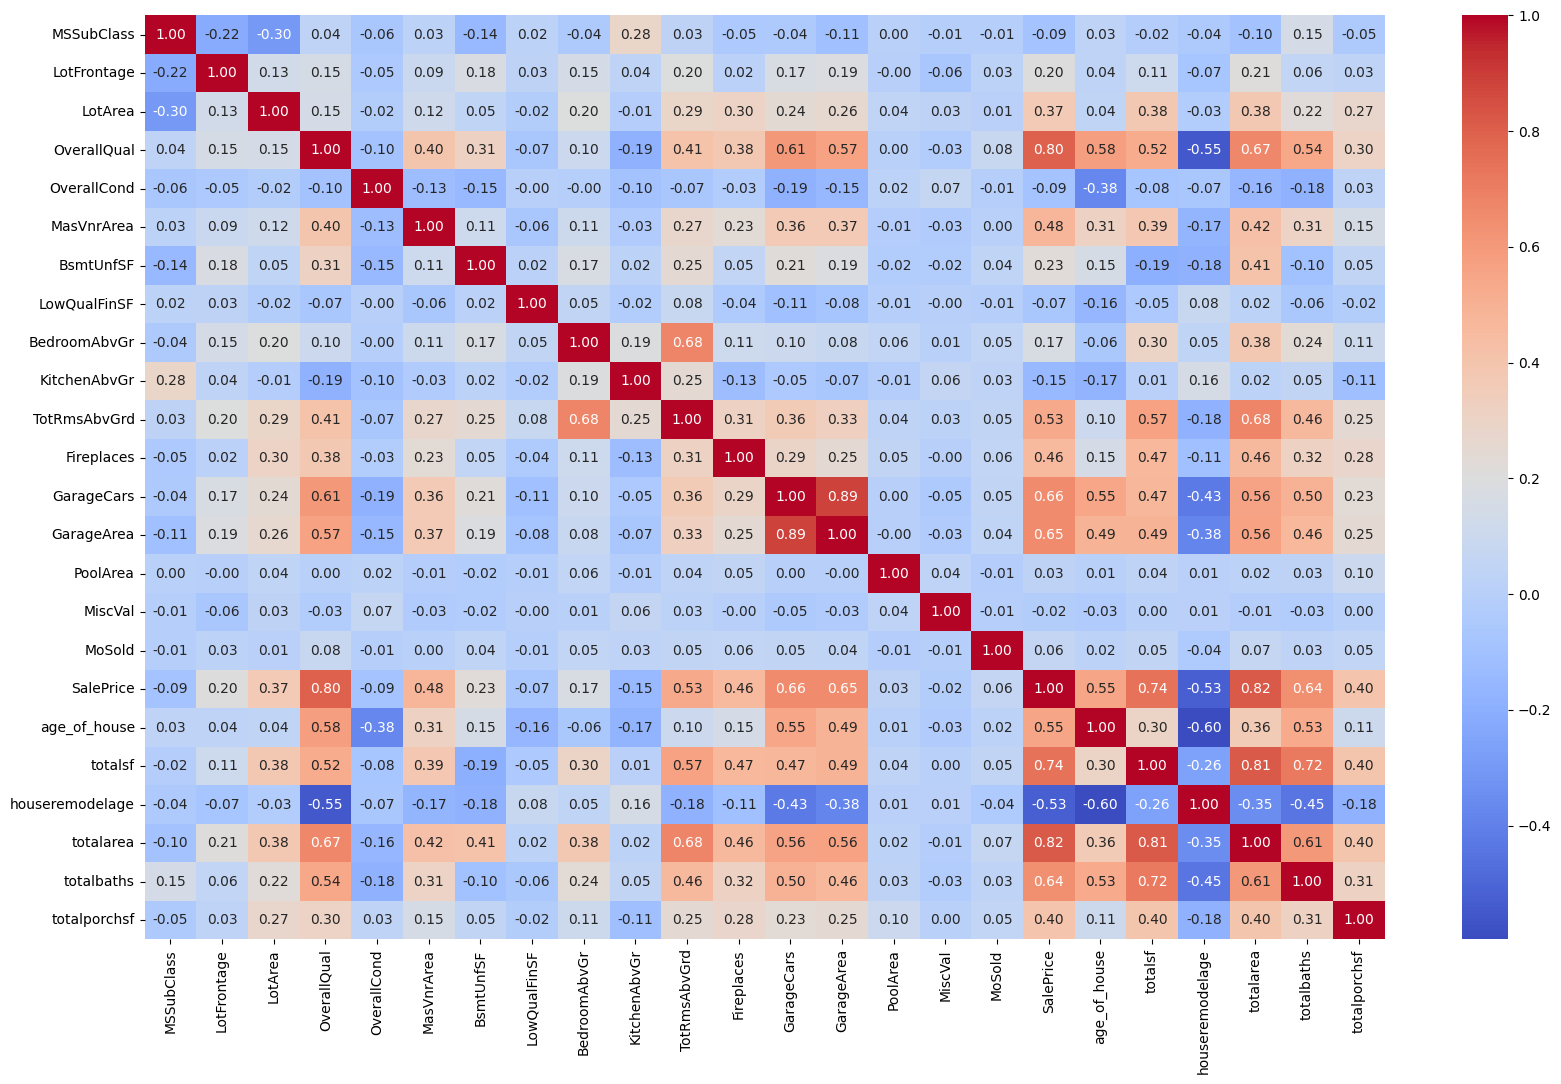

In [ ]:
correlation_matrix = tr2.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
tr2 = tr2.drop(columns=['GarageArea'])
te2= te2.drop(columns=['GarageArea'])

<Axes: xlabel='SalePrice', ylabel='Count'>

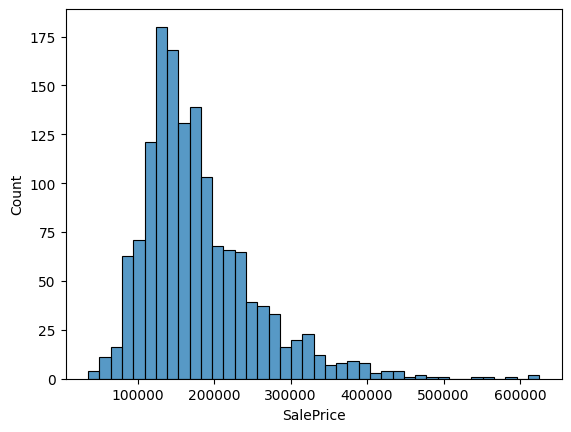

In [ ]:
sns.histplot(
    tr2,
    x=tr2['SalePrice']
)

In [ ]:
tr2.describe().T


,count,mean,std,min,25%,50%,75%,max
MSSubClass,1439.0,56.685198,42.040599,20.0,20.0,50.0,70.0,190.0
LotFrontage,1439.0,56.957609,32.842826,0.0,42.0,63.0,78.0,182.0
LotArea,1439.0,9978.494788,5344.308751,1300.0,7500.0,9439.0,11500.0,70761.0
OverallQual,1439.0,6.085476,1.359683,1.0,5.0,6.0,7.0,10.0
OverallCond,1439.0,5.580264,1.107089,1.0,5.0,5.0,6.0,9.0
MasVnrArea,1439.0,101.444753,177.273783,0.0,0.0,0.0,162.5,1600.0
BsmtUnfSF,1439.0,567.917999,442.304441,0.0,224.0,480.0,808.0,2336.0
LowQualFinSF,1439.0,4.902015,43.480314,0.0,0.0,0.0,0.0,528.0
BedroomAbvGr,1439.0,2.861710,0.803106,0.0,2.0,3.0,3.0,6.0
KitchenAbvGr,1439.0,1.047255,0.218712,1.0,1.0,1.0,1.0,3.0


In [ ]:
for col in tr2.columns:
    print(f"\n--- {col} ---")
    print(tr2[col].value_counts(dropna=False))


--- MSSubClass ---
MSSubClass
20     531
60     295
50     143
120     86
30      66
160     63
70      60
80      58
90      50
190     27
85      20
75      14
45      12
180     10
40       4
Name: count, dtype: int64

--- MSZoning ---
MSZoning
RL         1135
RM          216
FV           65
RH           15
C (all)       8
Name: count, dtype: int64

--- LotFrontage ---
LotFrontage
0.0      255
60.0     140
70.0      70
80.0      69
50.0      57
        ... 
149.0      1
182.0      1
138.0      1
152.0      1
46.0       1
Name: count, Length: 107, dtype: int64

--- LotArea ---
LotArea
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
12968     1
10652     1
10920     1
11241     1
10791     1
Name: count, Length: 1055, dtype: int64

--- Street ---
Street
Pave    1435
Grvl       4
Name: count, dtype: int64

--- LotShape ---
LotShape
Reg    916
IR1    478
IR2     37
IR3      8
Name: count, dtype: int64

--- LandContour ---
LandContour
Lvl    1301
Bnk      59
HLS 

In [ ]:
pip install ydata-profiling


  Using cached ydata_profiling-4.18.0-py2.py3-none-any.whl.metadata (22 kB)
  Using cached matplotlib-3.10.0-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
  Using cached phik-0.12.5-cp310-cp310-win_amd64.whl.metadata (5.6 kB)
  Using cached statsmodels-0.14.5-cp310-cp310-win_amd64.whl.metadata (9.8 kB)
  Using cached ImageHash-4.3.2-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached wordcloud-1.9.4-cp310-cp310-win_amd64.whl.metadata (3.5 kB)
Using cached ydata_profiling-4.18.0-py2.py3-none-any.whl (398 kB)
Using cached ImageHash-4.3.2-py2.py3-none-any.whl (296 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached matplotlib-3.10.0-cp310-cp310-win_amd64.whl (8.0 MB)
Using cached phik-0.12.5-cp310-cp310-win_amd64.whl (674 kB)
Using cached statsmodels-0.14.5-cp310-cp310-win_amd64.whl (9.6 MB)
Using cached visions-0.8.1-py3-none-any.whl (105 kB)
Using

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\billh\\anaconda3\\envs\\ban-final-project\\Lib\\site-packages\\matplotlib\\_c_internal_utils.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(tr2, title="Full EDA Report", explorative=True)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# ============================
# Full Cross-Tab Pipeline
# ============================

def auto_crosstabs(df, max_unique=20):
    """
    Automatically generate cross-tabulations for all pairs
    of categorical columns with <= max_unique distinct values.
    Includes raw counts, row %, and heatmap visualization.
    """

    # 1. Identify categorical columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    # 2. Keep only categorical columns with few unique values
    valid_cols = [c for c in cat_cols if df[c].nunique() <= max_unique]

    print(f"Found {len(valid_cols)} valid categorical columns:")
    print(valid_cols)

    # 3. Loop through all pairs
    for colA, colB in combinations(valid_cols, 2):
        print(f"\n\n============================")
        print(f"    {colA} × {colB}")
        print(f"============================")

        # ---- Raw counts ----
        ct = pd.crosstab(df[colA], df[colB])
        print("\nCounts:")
        print(ct)

        # ---- Row percentages ----
        row_pct = ct.div(ct.sum(axis=1), axis=0)
        print("\nRow %:")
        print(row_pct)

        # ---- Heatmap ----
        plt.figure(figsize=(6,4))
        sns.heatmap(ct, annot=True, cmap='Blues', fmt='g')
        plt.title(f"{colA} × {colB}")
        plt.ylabel(colA)
        plt.xlabel(colB)
        plt.tight_layout()
        plt.show()


# ============================
# Usage
# ============================

# auto_crosstabs(df, max_unique=20)   # Adjust max_unique depending on your data


AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [ ]:
import sys
print(sys.executable)




c:\Users\billh\anaconda3\envs\ban-final-project\python.exe


In [ ]:
pip show matplotlib


Name: matplotlib
Version: 3.10.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later
         
         1. This LICENSE AGREEMENT is between the Matplotlib Development Team
         ("MDT"), and the Individual or Organization ("Licensee") accessing and
         otherwise using matplotlib software in source or binary form and its
         associated documentation.
         
         2. Subject to the terms and conditions of this License Agreement, MDT
         hereby grants Licensee a nonexclusive, royalty-free, world-wide license
         to reproduce, analyze, test, perform and/or display publicly, prepare
         derivative works, distribute, and otherwise use matplotlib
         alone or in any derivative version, provided, however, that MDT's
         License Agreement and MDT's notice of copyright, i.e., "